<a href="https://colab.research.google.com/github/arunraja99/arunraja_s/blob/main/Machine_learning_beginning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import heapq
from heapq import heappop, heappush

In [ ]:
num_locations = 10
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)
num_vehicles = 3

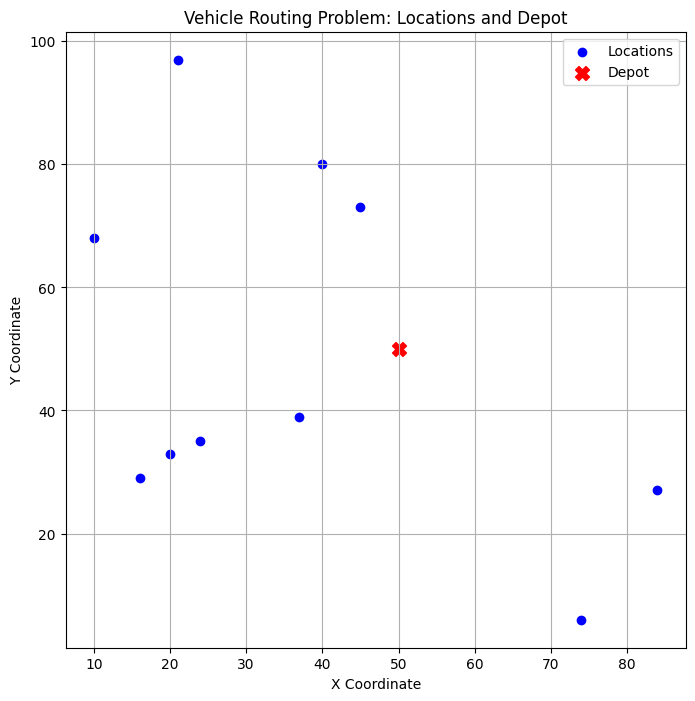

In [ ]:
plt.figure(figsize=(8, 8))
x_coords, y_coords = zip(*locations)
plt.scatter(x_coords, y_coords, c="blue", label="Locations")
plt.scatter(*depot, c="red", label="Depot", s=100, marker="X")
plt.title("Vehicle Routing Problem: Locations and Depot")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
def evalVRPHeap(individual):
    total_distance = 0
    heap = []
    distances = [0] * num_vehicles
    for i in range(num_vehicles):
      heapq. heappush(heap, (0, i))
    routes = [[] for _ in range(num_vehicles)]
    for loc_index in individual:
        loc = locations[loc_index]
        current_distance, vehicle_idx = heappop(heap)
        if routes[vehicle_idx]:
            last_location = routes[vehicle_idx][-1]
        else:
            last_location = depot
        added_distance = np.linalg.norm(np.array(last_location) - np.array(loc))
        current_distance += added_distance
        distances[vehicle_idx] += added_distance
        routes[vehicle_idx].append(loc)
        heappush(heap, (current_distance, vehicle_idx))
    for i in range(num_vehicles):
        if routes[i]:
            last_location = routes[i][-1]
            distances[i] += np.linalg.norm(np.array(last_location) - np.array(depot))
    total_distance = sum(distances)
    balance_penalty = np.std(distances)
    return total_distance + 10 * balance_penalty,

In [ ]:
toolbox.register("evaluate", evalVRPHeap)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	783.498	505.011
1  	218   	740.376	505.011
2  	240   	737.008	492.968
3  	240   	719.627	492.968
4  	233   	730.858	491.87 
5  	229   	714.47 	492.968
6  	222   	707.516	445.852
7  	239   	703.692	463.078
8  	226   	710.472	463.078
9  	239   	704.618	426.992
10 	233   	712.081	463.078
11 	229   	689.387	463.078
12 	229   	693.343	463.078
13 	227   	685.409	463.078
14 	207   	686.931	463.078
15 	233   	697.07 	463.078
16 	227   	689.67 	463.078
17 	228   	682.761	463.078
18 	243   	701.213	463.078
19 	237   	709.315	460.284
20 	238   	689.526	460.284
21 	242   	671.13 	463.078
22 	224   	666.316	463.078
23 	238   	663.177	463.078
24 	221   	634.652	463.078
25 	234   	603.252	463.078
26 	221   	556.601	463.078
27 	229   	522.262	463.078
28 	217   	517.225	463.078
29 	247   	514.09 	463.078
30 	233   	506.576	463.078
Best Individual:  [2, 7, 0, 4, 6, 8, 5, 1, 3, 9]
Best Fitness:  426.99184064634323


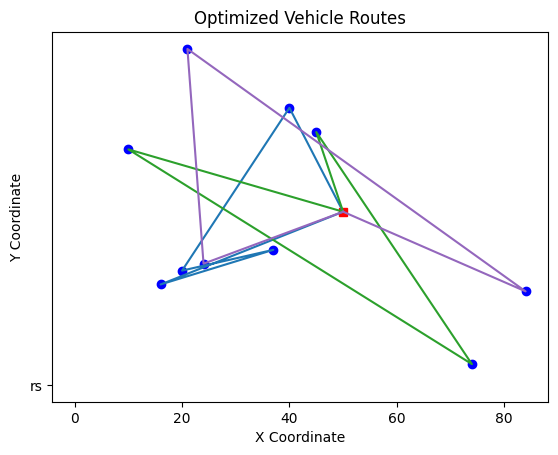

In [ ]:
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)

    return pop, stats, hof

if __name__ == "__main__":
    pop, stats, hof = main()

    # Print results
    print("Best Individual: ", hof[0])
    print("Best Fitness: ", hof[0].fitness.values[0])

    # Plot the best solution
    plot_routes(hof[0], title="Optimized Vehicle Routes")